<h2>Stock Market Analysis for Magnificent 7<h2>

In this project, we will discover: 
1. What was the change of stock prices from 2014 to 2024?
2. What was the moving average for different stocks? (5, 50, 120 days)
3. What are the anticipated returns and risks associated with each stock per share?  
4. Predict the stock price using LSTM method.

In [143]:
# Import the library we need
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import DataReader
from yahoofinancials import YahooFinancials
import torch
import torch.nn as nn
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM

<h2>1. What was the change of stock prices from 2014 to 2024?<h2>

We want to implement the data from Yahoo Finance. We decide to take 10 years from 1/1/2014 to 1/1/2024. 

In [144]:
# Define the list of tech tickers
tech_list = ['MSFT', 'AMZN', 'META', 'AAPL', 'GOOGL', 'NVDA', 'TSLA']

ticker_dfs = {}

# Loop through each ticker
for ticker in tech_list:
    # Fetch historical data for the current ticker from 2014-01-01 to 2023-12-31
    yahoo_financials = YahooFinancials(ticker)
    data = yahoo_financials.get_historical_price_data(start_date='2014-01-01', 
                                                      end_date='2023-12-31', 
                                                      time_interval='daily')
    df = pd.DataFrame(data[ticker]['prices'])
    df = df.drop('date', axis=1).rename(columns={'formatted_date':'Date'}).set_index('Date')
    
    ticker_dfs[ticker] = df

# Take Apple as an example to see if the data was implemented.  
AAPL_df = ticker_dfs['AAPL']
AAPL_df

,high,low,open,close,volume,adjclose
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800,17.296650
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600,16.916725
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800,17.008968
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200,16.887323
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600,16.994270
...,...,...,...,...,...,...
2023-12-22,195.410004,192.970001,195.179993,193.600006,37122800,193.353287
2023-12-26,193.889999,192.830002,193.610001,193.050003,28919300,192.803986
2023-12-27,193.500000,191.089996,192.490005,193.149994,48087700,192.903839


Now we can put all the stock price together to see how the price changed during 2014 to 2024.

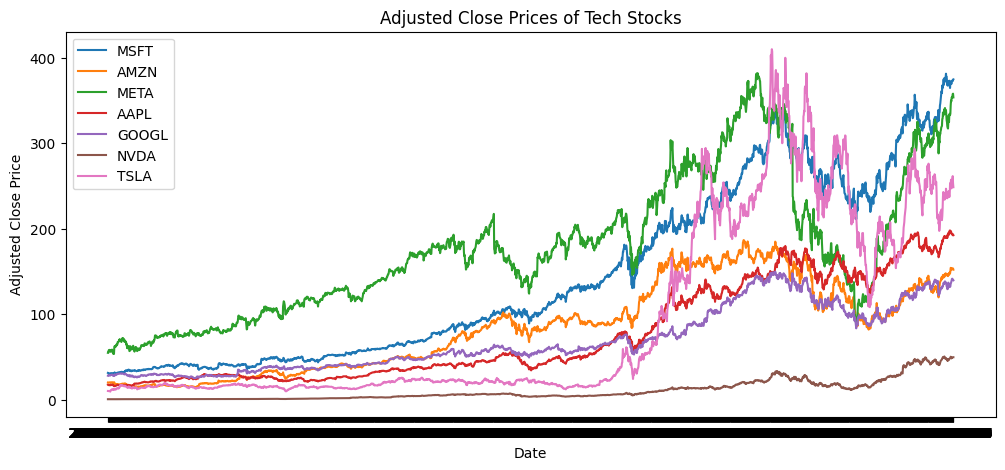

In [145]:
plt.figure(figsize=(12, 5)) 
for ticker in tech_list:
    # Plot the adjusted close price for the current ticker
    ticker_df = ticker_dfs[ticker]
    plt.plot(ticker_df.index, ticker_df['adjclose'], label = ticker)

plt.title('Adjusted Close Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

<h2>2. What was the moving average of the stocks?<h2>

Moving average is a popular statistical technique used to analyze time-series data by calculating the average of certain period data points, we can found many different types of moving average such as Simple Moving Average(SMA), Exponential Moving Average(EMA), etc. It is widely used in financial analysis to identify the trends and potential opportunities in investment. For the following, I am going to use 5 days, 50 days, and 120 days as example.

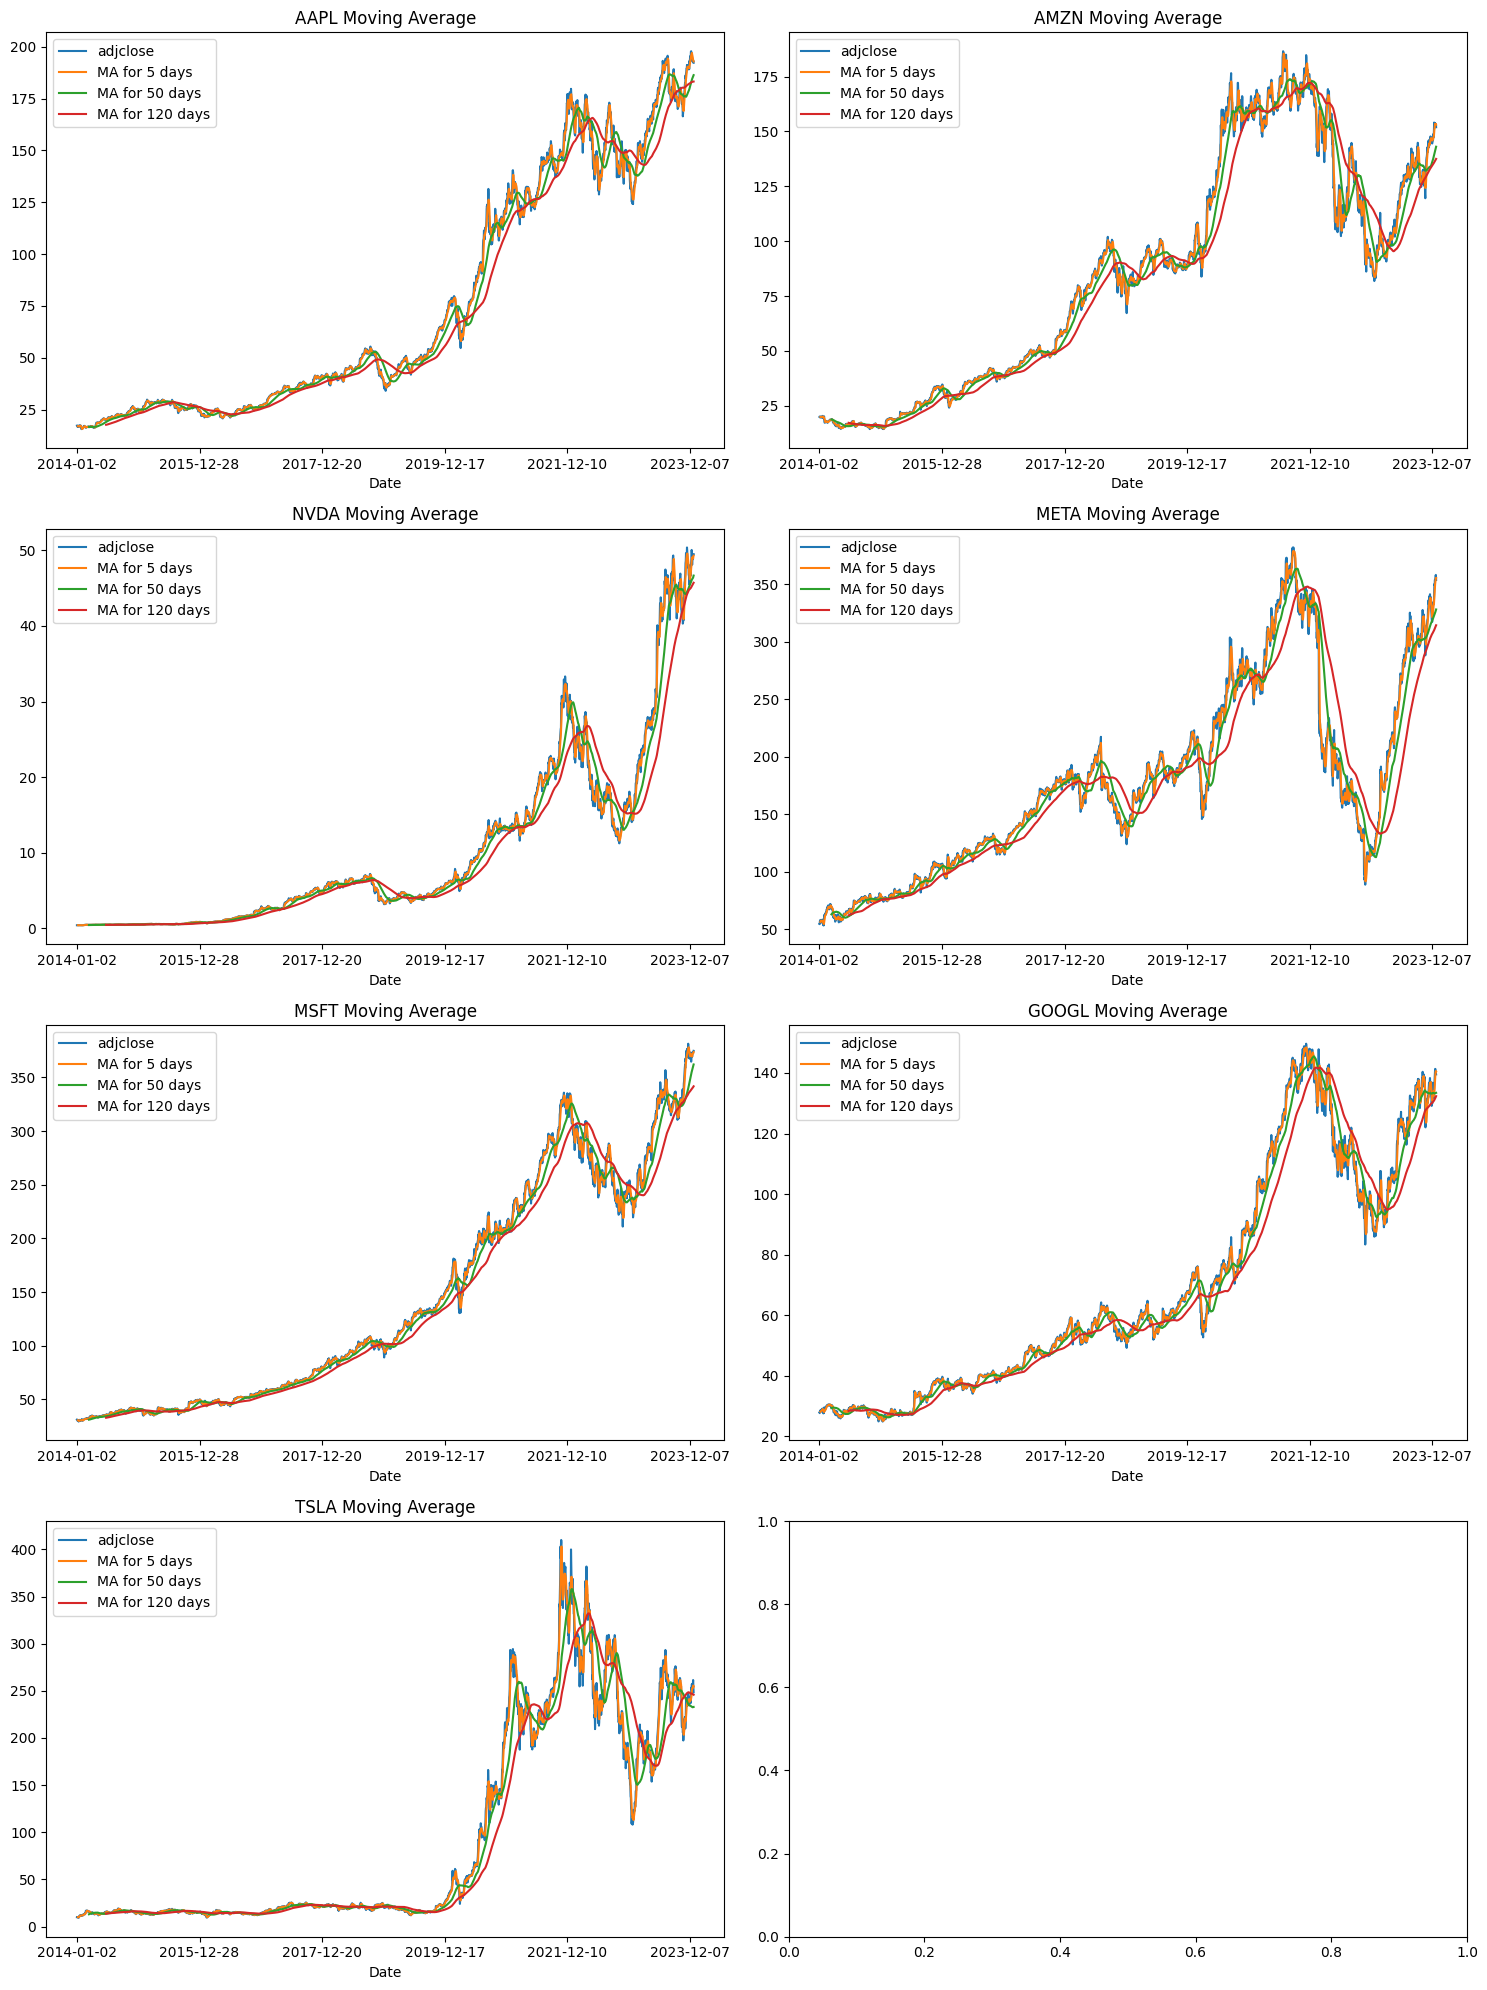

In [146]:
AAPL_df = ticker_dfs['AAPL']
AMZN_df = ticker_dfs['AMZN']
NVDA_df = ticker_dfs['NVDA']
META_df = ticker_dfs['META']
MSFT_df = ticker_dfs['MSFT']
GOOGL_df = ticker_dfs['GOOGL']
TSLA_df = ticker_dfs['TSLA']

# Calculate moving averages for AAPL
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AAPL_df[column_name] = AAPL_df['adjclose'].rolling(window=ma, center=False).mean()

# AMZN
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    AMZN_df[column_name] = AMZN_df['adjclose'].rolling(window=ma, center=False).mean()

# NVDA
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    NVDA_df[column_name] = NVDA_df['adjclose'].rolling(window=ma, center=False).mean()

# META
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    META_df[column_name] = META_df['adjclose'].rolling(window=ma, center=False).mean()

# MSFT
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    MSFT_df[column_name] = MSFT_df['adjclose'].rolling(window=ma, center=False).mean()

# GOOGL
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOGL_df[column_name] = GOOGL_df['adjclose'].rolling(window=ma, center=False).mean()

# TSLA
ma_day = [5, 50, 120]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    TSLA_df[column_name] = TSLA_df['adjclose'].rolling(window=ma, center=False).mean()


# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot moving averages
AAPL_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[0, 0], title='AAPL Moving Average')

AMZN_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[0, 1], title='AMZN Moving Average')

NVDA_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[1, 0], title='NVDA Moving Average')

META_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[1, 1], title='META Moving Average')

MSFT_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[2, 0], title='MSFT Moving Average')

GOOGL_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[2, 1], title='GOOGL Moving Average')

TSLA_df[['adjclose', 'MA for 5 days', 'MA for 50 days', 'MA for 120 days']].plot(ax=axes[3, 0], title='TSLA Moving Average')

plt.tight_layout()

plt.show()


We can notice that the greater the number of moving average days, the smoother the trend line will becomes.

<h2>3. Visualzing Risk-Return Profiles for companies. <h2>

Now we know the moving average of these companies, but what is more important is which companies we want to put our bet on. Since all the companies we listed are rank A company, we need to see the sharpe ratio to determine which company can bring us the highest expected return with the lowest risk? And how much value do we put at risk by investing those company? 

In [147]:
adjclose_df = pd.DataFrame()

# Take only the adj close price 
for ticker in tech_list:
    adjclose_df[ticker] = ticker_dfs[ticker]['adjclose']

# Simplified Risk free rate
# We average the 2014 and 2024 risk-free rate  
Risk_free_rate = (1.0 + ((0.03 + 0.0395) / 2.0)) ** (1.0 / 252.0) - 1

# Calculate the daily percentage return
rets = adjclose_df.pct_change()
rets = rets.dropna()
rets

,MSFT,AMZN,META,AAPL,GOOGL,NVDA,TSLA
Date,,,,,,,
2014-01-03,-0.006728,-0.003845,-0.002742,-0.021965,-0.007295,-0.011980,-0.003598
2014-01-06,-0.021133,-0.007088,0.048387,0.005453,0.011149,0.013401,-0.017117
2014-01-07,0.007750,0.011178,0.012587,-0.007152,0.019278,0.016373,0.016054
2014-01-08,-0.017852,0.009773,0.005352,0.006333,0.002081,0.013631,0.012855
2014-01-09,-0.006432,-0.002264,-0.017345,-0.012770,-0.009630,-0.037286,-0.024788
...,...,...,...,...,...,...,...
2023-12-22,0.002784,-0.002730,-0.001977,-0.005547,0.007620,-0.003266,-0.007701
2023-12-26,0.000214,-0.000065,0.004075,-0.002841,0.000212,0.009195,0.016116
2023-12-27,-0.001575,-0.000456,0.008455,0.000518,-0.008126,0.002800,0.018822


MSFT     0.058570
AMZN     0.042626
META     0.037698
AAPL     0.054949
GOOGL    0.037555
NVDA     0.076368
TSLA     0.050060
dtype: float64


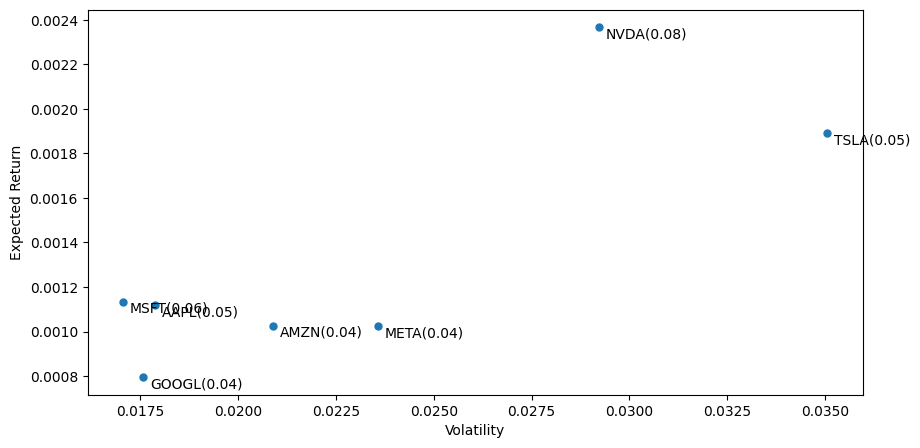

In [148]:
plt.figure(figsize=(10, 5))

# Calculate expected return over risk
sharpe_ratio = (rets.mean() - Risk_free_rate) / rets.std()
print(sharpe_ratio)

# Swap rets.std() and rets.mean() to plot volatility on x-axis and return on y-axis
plt.scatter(rets.std(), rets.mean(), s=25)

plt.ylabel('Expected Return')
plt.xlabel('Volatility')

for label, x, y, ratio in zip(rets.columns, rets.std(), rets.mean(), sharpe_ratio):
    plt.annotate(
        f'{label}({ratio:.2f})',  # Include the ratio in the annotation text
        xy=(x, y),
        xytext=(5, -5),  # Adjust the position of the text relative to the point
        textcoords='offset points',
        ha='left',  # Align text to the left of the point
        va='center')  # Align text vertically centered with the point

plt.show()


For individuals who are pursuing stability and safety, investing in stocks with lower risk and moderate expected returns would be advisable. In this case, consider stocks like AAPL and MSFT as it has the lowest risk among all listed. For those willing to take on more risk for potentially higher returns, NVDA could be their best choices as these stocks have the highest expected return with the higher level of risk.

<h2>4. Predict the closing price stock price using LSTM.</h2>

Take AAPL as example to predict the future stock price. 

In [162]:
# Ensure the data is not leaking future information
df = ticker_dfs['AAPL']
df
adjclose = df[['adjclose']]

adjclose = adjclose.fillna(method='ffill')
data = df.filter(['adjclose'])
dataset = data.values


training_data_len = int(np.ceil(len(dataset) * 0.95))
training_data_len


C:\Users\54088\AppData\Local\Temp\ipykernel_10120\949581202.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adjclose = adjclose.fillna(method='ffill')


2391

In [163]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00915484],
       [0.00706997],
       [0.00757616],
       ...,
       [0.97281615],
       [0.97517285],
       [0.96941822]])

In [165]:
# Create the training data set 
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00915484, 0.00706997, 0.00757616, 0.00690862, 0.0074955 ,
       0.00630464, 0.00569024, 0.00616907, 0.00799829, 0.00988072,
       0.00934708, 0.00701673, 0.0084582 , 0.00887688, 0.00967825,
       0.00794339, 0.00870355, 0.00115319, 0.00016647, 0.        ,
       0.00014073, 0.00030033, 0.00154614, 0.00219822, 0.00271092,
       0.00394863, 0.00555577, 0.00675903, 0.00675212, 0.0082212 ,
       0.00814524, 0.00849046, 0.00700246, 0.00592871, 0.00491017,
       0.00530724, 0.00435951, 0.00354644, 0.00532795, 0.0050811 ,
       0.00534349, 0.00594425, 0.00613757, 0.00585966, 0.00580613,
       0.00588898, 0.00678149, 0.0068712 , 0.00584238, 0.00481353,
       0.00516739, 0.00597185, 0.00594768, 0.00550574, 0.00622561,
       0.00731662, 0.00831785, 0.00741849, 0.00701797, 0.0069144 ])]
[0.006893705631965591]

[array([0.00915484, 0.00706997, 0.00757616, 0.00690862, 0.0074955 ,
       0.00630464, 0.00569024, 0.00616907, 0.00799829, 0.00988072,
       0.00934708, 0.00701673, 0.0

In [166]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\54088\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2331/2331 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 0.0030


In [167]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


7.499014582798267

C:\Users\54088\AppData\Local\Temp\ipykernel_10120\1185534964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


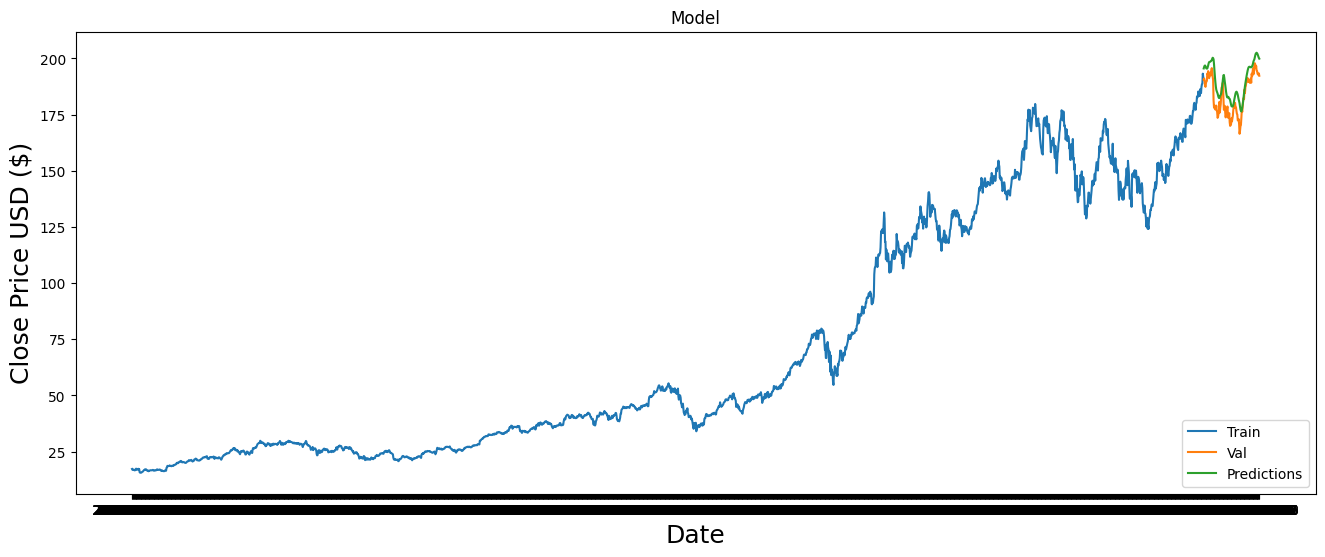

In [169]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['adjclose'])
plt.plot(valid[['adjclose', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()